In [1]:
import numpy as np
from starfish.set import settings

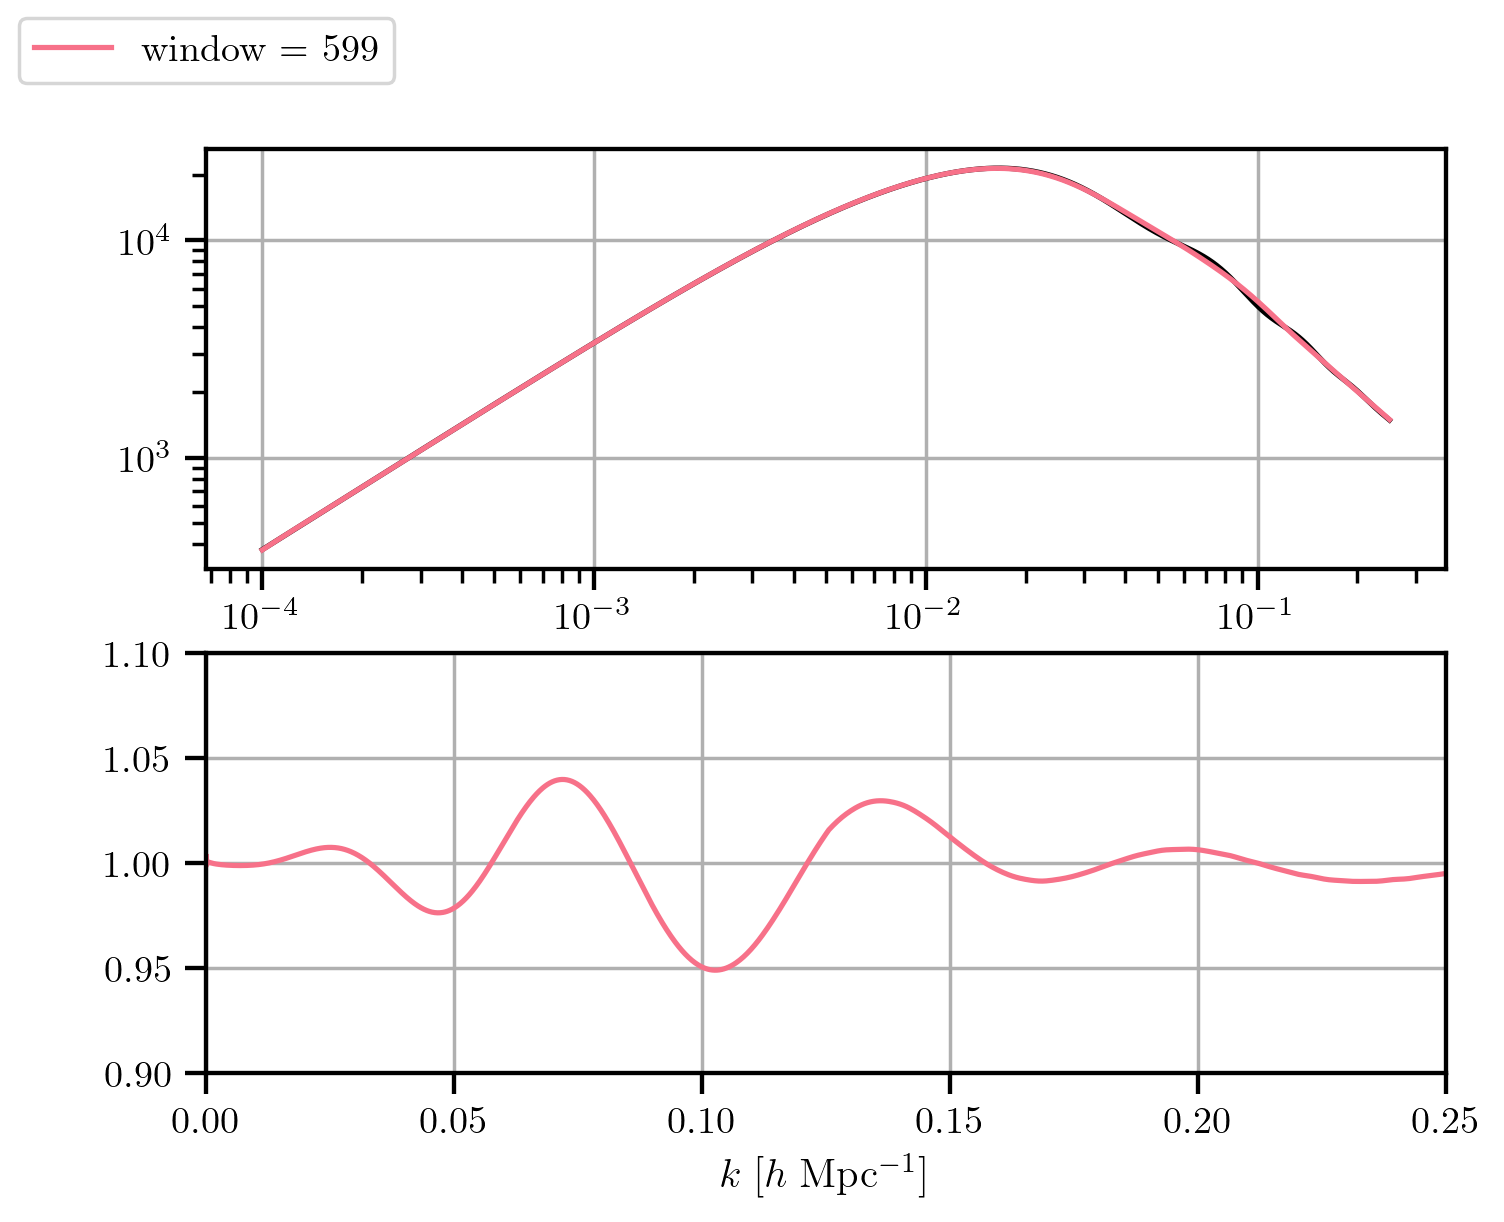

In [2]:
from starfish.galaxy.power import P_lin_w0wacdm
from starfish.plot import check_wiggle
pars,res,PK=P_lin_w0wacdm(*settings.cosmo_value)
check_wiggle(PK,window_array=settings.window_len)

In [3]:
from starfish.galaxy.multitracer import get_Fisher
fisher=get_Fisher(lcdm=False)

process started!
fiducial volumes:
V_fid (0.1) = 2.63e+08
V_fid (0.3) = 1.53e+09
V_fid (0.5) = 3.32e+09
V_fid (0.7) = 5.14e+09
V_fid (0.9) = 6.73e+09
V_fid (1.1) = 8.01e+09
V_fid (1.3) = 8.99e+09
V_fid (1.5) = 9.71e+09
V_fid (1.7) = 1.02e+10
fiducial biases:
#################### tracer: BGS ####################
b_fid (0.1) = 1.41
b_fid (0.3) = 1.57
b_fid (0.5) = 1.75
b_fid (0.7) = 1.93
b_fid (0.9) = 2.12
b_fid (1.1) = 2.31
b_fid (1.3) = 2.51
b_fid (1.5) = 2.71
b_fid (1.7) = 2.92
#################### tracer: LRG ####################
b_fid (0.1) = 1.79
b_fid (0.3) = 2.00
b_fid (0.5) = 2.22
b_fid (0.7) = 2.45
b_fid (0.9) = 2.69
b_fid (1.1) = 2.93
b_fid (1.3) = 3.19
b_fid (1.5) = 3.44
b_fid (1.7) = 3.70
#################### tracer: ELG ####################
b_fid (0.1) = 0.89
b_fid (0.3) = 0.99
b_fid (0.5) = 1.09
b_fid (0.7) = 1.21
b_fid (0.9) = 1.33
b_fid (1.1) = 1.45
b_fid (1.3) = 1.57
b_fid (1.5) = 1.70
b_fid (1.7) = 1.83
#################### tracer: QSO ####################
b_fid (0.1) 

In [4]:
import pandas as pd
cosmo_name=settings.var_name[:settings.cosmo_num]
fisher_valid=fisher.copy()
for index in fisher.index:
    if (fisher_valid.loc[index,:]==0).all():
        fisher_valid=fisher_valid.drop(index,axis=0)
        fisher_valid=fisher_valid.drop(index,axis=1)
fisher_valid.to_excel(settings.save_path+'valid.xlsx')
cov_valid=pd.DataFrame(np.linalg.inv(fisher_valid.values)[:settings.cosmo_num,:settings.cosmo_num],index=cosmo_name,columns=cosmo_name)

In [5]:
name_width=max([len(v) for v in cosmo_name])
error_dict=dict(zip(cosmo_name,np.sqrt(np.diag(cov_valid.values))))
print('1-sigma errors:')
for key in error_dict.keys():
    print(f'-- {key.rjust(name_width)}: {error_dict[key]:.1e}')

1-sigma errors:
-- omega_m0: 1.5e-02
-- omega_b0: 3.6e-03
--        h: 1.2e-02
--      n_s: 3.3e-02
--  sigma_8: 2.8e-02
--     m_nu: 2.8e-01
--    N_eff: 6.7e-01
--       w0: 7.3e-02
--       wa: 3.6e-01
